In [6]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt



In [7]:
data = pd.read_csv(r"C:\dataset\phase 2\golden task(spam mail)\emails.csv")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline


In [9]:
print(data.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [10]:
print(data.describe())

              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [11]:
print(data.columns)

Index(['text', 'spam'], dtype='object')


In [12]:
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

data['processed_text'] = data['text'].apply(preprocess_text)
for i in range(3):
    print("Original:", data['text'][i])
    print("Preprocessed:", data['processed_text'][i])
    print()

Original: Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability :

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['spam'], test_size=0.2, random_state=42)


model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)


predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


print(classification_report(y_test, predictions))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [14]:
print(data['spam'].value_counts())

spam
0    4360
1    1368
Name: count, dtype: int64


In [15]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[851   5]
 [  7 283]]


In [16]:
feature_names = model.named_steps['countvectorizer'].get_feature_names_out()


log_probabilities = model.named_steps['multinomialnb'].feature_log_prob_


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'LogProbability_Spam': log_probabilities[1], 'LogProbability_NotSpam': log_probabilities[0]})

print("Top words contributing to spam:")
print(feature_importance_df.sort_values(by='LogProbability_Spam', ascending=False).head(10))
print("\nTop words contributing to non-spam:")
print(feature_importance_df.sort_values(by='LogProbability_NotSpam', ascending=False).head(10))

Top words contributing to spam:
           Feature  LogProbability_Spam  LogProbability_NotSpam
25895      subject            -4.828210               -4.347068
4935           com            -5.359813               -5.032219
5058       company            -5.470713               -6.534127
8483         email            -5.481575               -6.337603
3501      business            -5.527872               -6.289627
13131  information            -5.581576               -6.029301
17225        money            -5.685023               -8.724871
15933         mail            -5.764587               -6.263495
18711          one            -5.815554               -6.083325
20237       please            -5.837581               -5.006771

Top words contributing to non-spam:
        Feature  LogProbability_Spam  LogProbability_NotSpam
8776      enron           -11.944604               -3.896092
8183        ect           -11.251457               -4.083503
25895   subject            -4.828210        

In [17]:
class_imbalance_ratio = data['spam'].value_counts()[1] / data['spam'].value_counts()[0]
print(f"Class Imbalance Ratio: {class_imbalance_ratio:.2f}")

Class Imbalance Ratio: 0.31


In [18]:
test_set_with_predictions = X_test.to_frame().assign(Predicted=predictions, Actual=y_test)

misclassified_samples = test_set_with_predictions[test_set_with_predictions['Predicted'] != test_set_with_predictions['Actual']]
print("Misclassified samples:")
print(misclassified_samples.head())

Misclassified samples:
                                         processed_text  Predicted  Actual
401   subject nymex invitation learn power trading p...          0       1
333   subject benachrichtung zum fehlgeschlagen dies...          0       1
1411  subject investment may concern keep receiving ...          1       0
712   subject wm subject dear guests explore turkey ...          0       1
79    subject join focus groups earn money la carte ...          0       1


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.98
Recall: 0.98
F1-Score: 0.98


In [20]:
metrics_dict = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value'])
print(metrics_df)

      Metric     Value
0   Accuracy  0.989529
1  Precision  0.982639
2     Recall  0.975862
3   F1-Score  0.979239


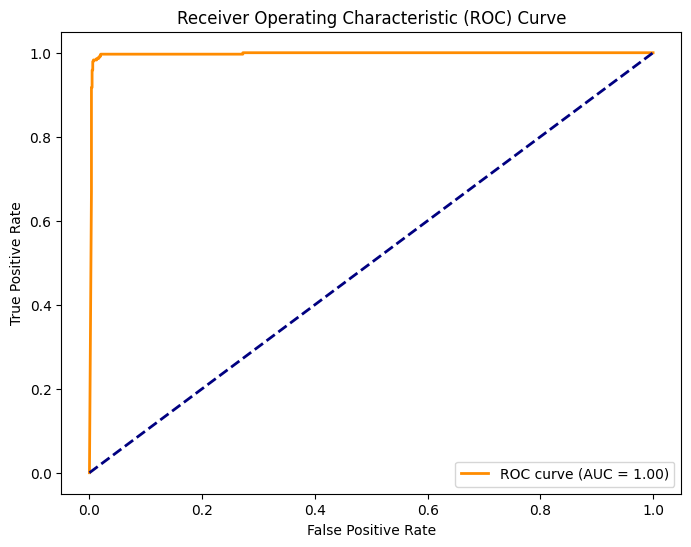

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

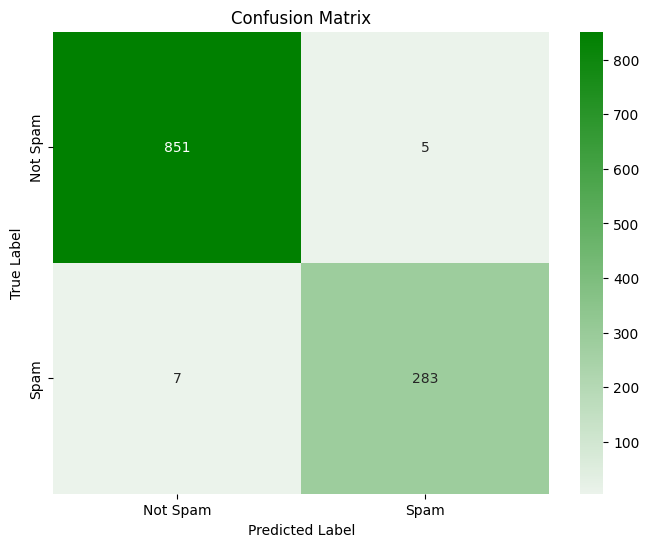

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, predictions)


cmap = sns.light_palette("green", as_cmap=True)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


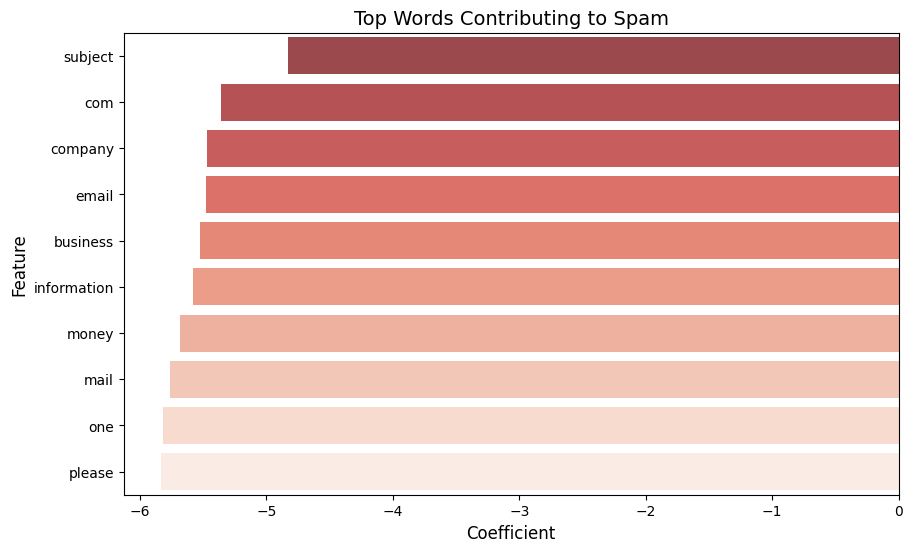

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


num_features = len(top_features)
red_palette = sns.color_palette("Reds", n_colors=num_features)


red_palette = red_palette[::-1]


plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, hue='Feature', palette=red_palette, dodge=False, alpha=0.8)


plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top Words Contributing to Spam', fontsize=14)


plt.legend([], [], frameon=False)


plt.show()


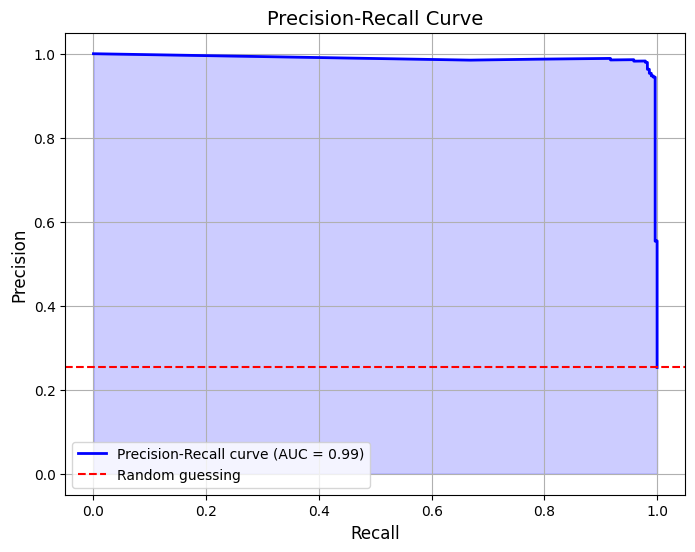

In [25]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))

plt.plot(recall, precision, color='b', linewidth=2, label='Precision-Recall curve (AUC = {:.2f})'.format(pr_auc))

plt.fill_between(recall, precision, color='b', alpha=0.2)

plt.axhline(y=sum(y_test) / len(y_test), color='r', linestyle='--', label='Random guessing')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left', fontsize=10)

# Show plot
plt.grid(True)
plt.show()


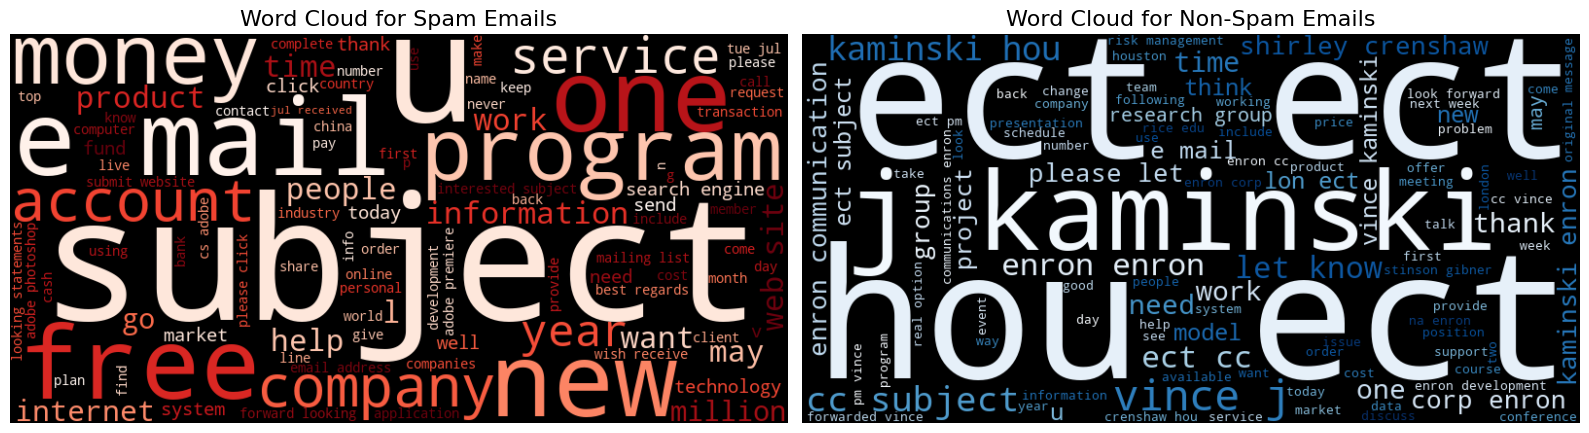

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(data[data['spam'] == 1]['processed_text'])
non_spam_words = ' '.join(data[data['spam'] == 0]['processed_text'])

spam_cmap = plt.cm.Reds
non_spam_cmap = plt.cm.Blues

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=800, height=400, random_state=42, max_words=100, colormap=spam_cmap).generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_non_spam = WordCloud(width=800, height=400, random_state=42, max_words=100, colormap=non_spam_cmap).generate(non_spam_words)
plt.imshow(wordcloud_non_spam, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Emails', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


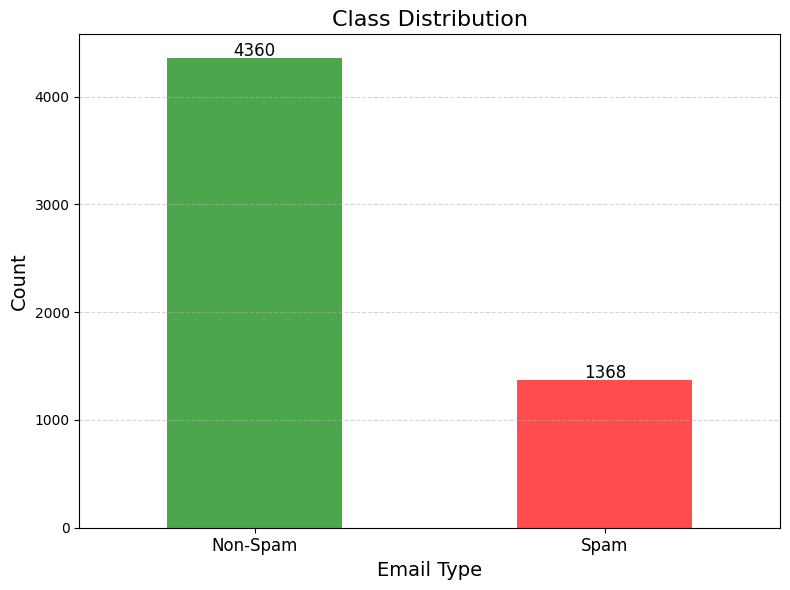

In [28]:
import matplotlib.pyplot as plt

class_counts = data['spam'].value_counts()

colors = ['green', 'red']

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=colors, alpha=0.7)

plt.xticks([0, 1], ['Non-Spam', 'Spam'], rotation=0, fontsize=12)

plt.title('Class Distribution', fontsize=16)
plt.xlabel('Email Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

for i, count in enumerate(class_counts):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


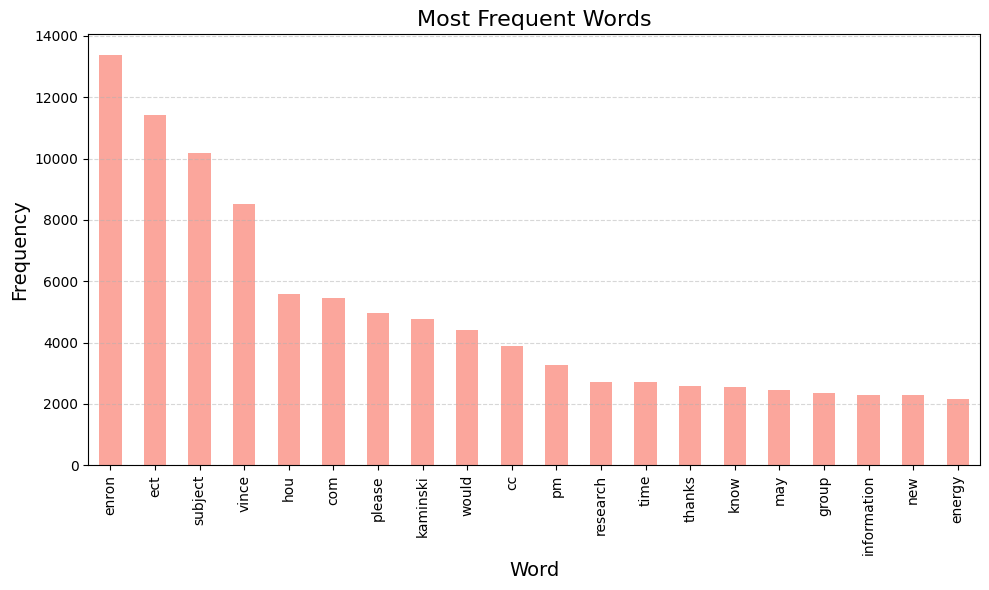

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(data['processed_text'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

bar_color = 'salmon'

plt.figure(figsize=(10, 6))
word_freq.sum().sort_values(ascending=False).plot(kind='bar', color=bar_color, alpha=0.7)

plt.title('Most Frequent Words', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


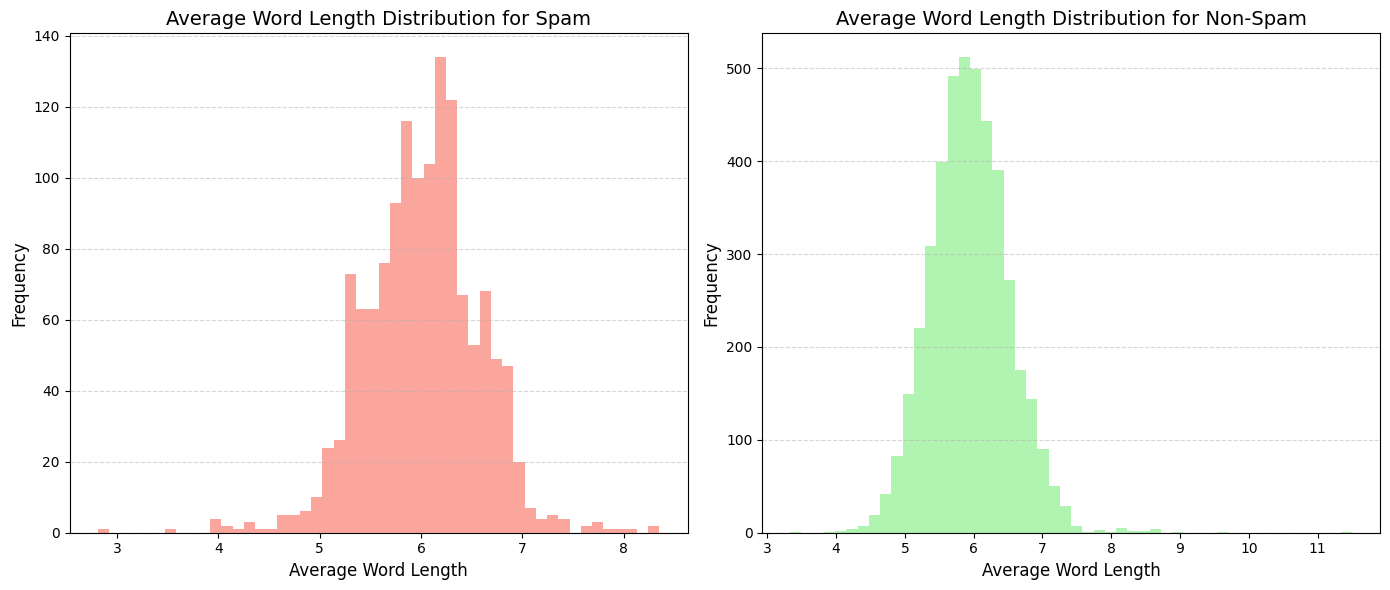

In [30]:

data['avg_word_length'] = data['processed_text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
data[data['spam'] == 1]['avg_word_length'].plot(kind='hist', bins=50, color='salmon', alpha=0.7)
plt.title('Average Word Length Distribution for Spam', fontsize=14)
plt.xlabel('Average Word Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.subplot(1, 2, 2)
data[data['spam'] == 0]['avg_word_length'].plot(kind='hist', bins=50, color='lightgreen', alpha=0.7)
plt.title('Average Word Length Distribution for Non-Spam', fontsize=14)
plt.xlabel('Average Word Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


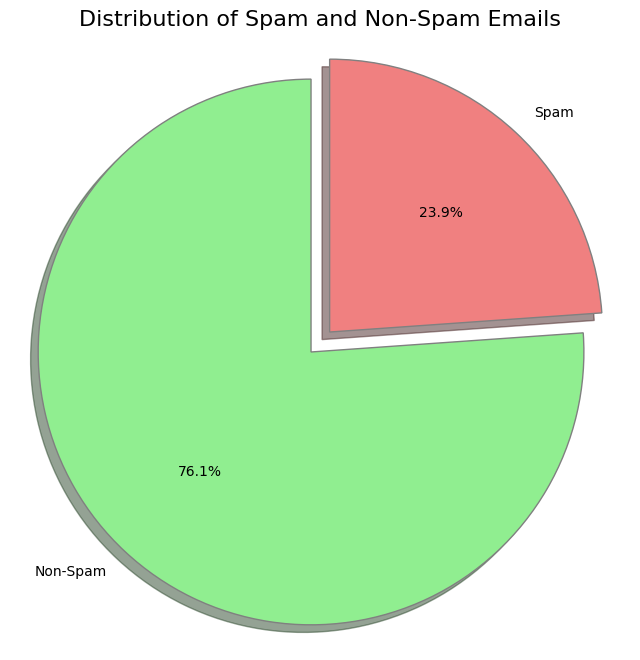

In [31]:
import matplotlib.pyplot as plt

labels = ['Non-Spam', 'Spam']
sizes = data['spam'].value_counts()
colors = ['lightgreen', 'lightcoral']
explode = (0, 0.1)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'edgecolor': 'gray'})
plt.title('Distribution of Spam and Non-Spam Emails', fontsize=16)
plt.axis('equal') 

plt.show()


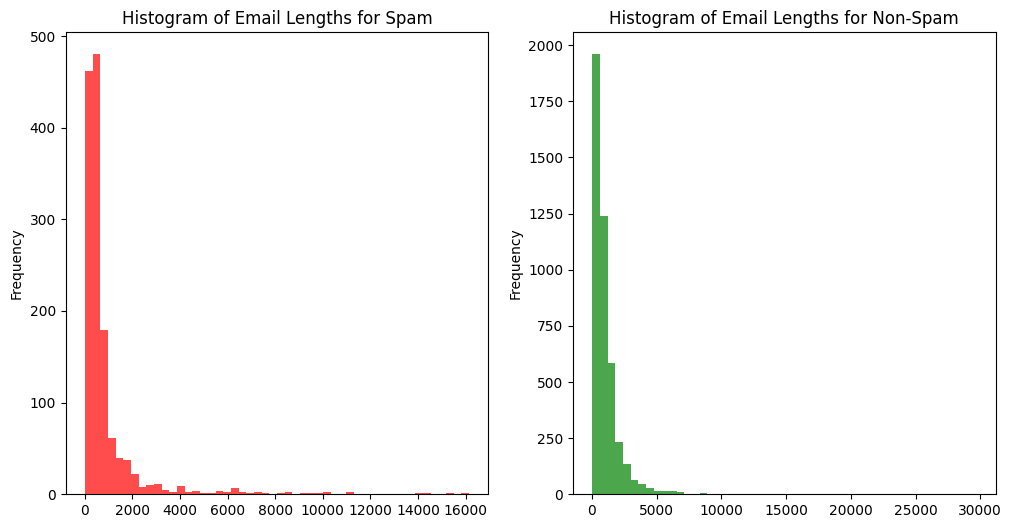

In [32]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data[data['spam'] == 1]['processed_text'].apply(len).plot(kind='hist', bins=50, color='r', alpha=0.7)
plt.title('Histogram of Email Lengths for Spam')

plt.subplot(1, 2, 2)
data[data['spam'] == 0]['processed_text'].apply(len).plot(kind='hist', bins=50, color='g', alpha=0.7)
plt.title('Histogram of Email Lengths for Non-Spam')

plt.show()